In [1]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.stats as stats

import compare_prediction_vs_experiment as cpe # main function script

input_experimental_txt= 'second_set_SERCaMP_Response_Data.txt'
run_type = 'ranking'
home_dir ='/home/bxie/PycharmProjects/KDEL/benchmark/building_new_model/95_training_database_predict_89batch'
experimental_data = os.path.join(home_dir,'raw_data', input_experimental_txt)


In [2]:
#loading a number of lists: negative_sequences_human,negative_sequences_artificial, positive_sequences_human,positive_sequences_artificial
if os.path.isfile(home_dir+'/negatives_39_sequences.xlsx') and os.path.isfile(home_dir+'/positives_29_sequences.xlsx'):
  neg_sequences_h, neg_sequences_a = cpe.read_excel(home_dir+'/negatives_39_sequences.xlsx')
  print ('#--- read from negative_39_sequences.xlsx, total%4d sequences'%len(neg_sequences_h))
  pos_sequences_h, pos_sequences_a = cpe.read_excel(home_dir+'/positives_29_sequences.xlsx')
  print ('#--- read from poitives_29_sequences.xlsx, total%4d sequences'%len(pos_sequences_h))
else:
  print ('CANNOT FIND REFERENCE EXCEL FILES! TERMINATE PROCESS')
  sys.exit()

print ('neg_sequences_h', neg_sequences_h) #for testing

#--- read from negative_39_sequences.xlsx, total  39 sequences
#--- read from poitives_29_sequences.xlsx, total  29 sequences
neg_sequences_h ['DLTPLDF', 'PPVDGDL', 'KGIGGDF', 'GERDGDF', 'PLQPGEF', 'DLPAGDY', 'PLAPGQF', 'ELLSAQF', 'DELSLKF', 'QDGDFDF', 'DLSEDEF', 'LLGPSNF', 'DESDNDF', 'RLLPGIF', 'ELLDPSF', 'GISKEEF', 'GQDDLDF', 'EPQSGDL', 'KIAKGIF', 'DPVHSEF', 'EELRNPF', 'IKGKTRF', 'PETSGDL', 'KACEKEF', 'DDLPLEL', 'PAQRGEF', 'ALLSLNF', 'ELDIEDF', 'PPRNLGY', 'FTLDADF', 'DDSDDEF', 'PPSEPNF', 'MIRPADF', 'ELDLLEF', 'PLMPSDF', 'TVGRNDF', 'DYDKGEF', 'ELLAQQF', 'KELPEDL']


In [3]:
#for testing:
run_type='score'
tem_predict = cpe.read_seperate_prediction_results('all_predict_checkpoints', 0, run_type,home_dir)#model 0 prediction results 
print (run_type)
print (tem_predict)

score
[('DLTPLDF', 1.08597), ('KGIGGDF', 1.10907), ('QDGDFDF', 1.536), ('DESDNDF', 1.64131), ('ELLSAQF', 1.64248), ('GERDGDF', 1.77591), ('ELDLLEF', 1.78308), ('ELLAQQF', 2.00196), ('PLAPGQF', 2.0436), ('ELDIEDF', 2.17281), ('KIAKGIF', 2.23166), ('EELRNPF', 2.23539), ('DDSDDEF', 2.26033), ('DLSEDEF', 2.3197), ('DELSLKF', 2.33094), ('ELLDPSF', 2.36291), ('MIRPADF', 2.41886), ('KRRQQNF', 2.43008), ('PETSGDL', 2.48946), ('RLLPGIF', 2.50938), ('PPVDGDL', 2.52491), ('PLQPGEF', 2.52536), ('PPSEPNF', 2.54896), ('DDLPLEL', 2.5719), ('KELPEDL', 2.73234), ('DYDKGEF', 2.75497), ('ALLSLNF', 2.76401), ('TVGRNDF', 2.76416), ('EPQSGDL', 2.77665), ('PPRNLGY', 2.85302), ('GISKEEF', 2.98803), ('IKGKTRF', 3.02954), ('DLPAGDY', 3.03959), ('GRCEAVL', 3.04146), ('LISEEDL', 3.08049), ('FTLDADF', 3.10551), ('RKAQEDL', 3.11604), ('PAQRGEF', 3.23238), ('DPVHSEF', 3.26342), ('RQKHAVF', 3.27567), ('EEERTDL', 3.30654), ('KACEKEF', 3.31215), ('TAEADEL', 3.45851), ('GQDDLDF', 3.49408), ('LLGPSNF', 3.60193), ('RHARGE

#--- total number of human negative i  39 -------*
#--- total number of human poitive is  15 -------*
#--- total number of artificial negative i  0 ---*
#--- total number of artificial poitive is  14 ---*
#--- total number of other is  21 ---------------*
********** Pearson R is 0.6539131958742399 ******************************
********** correlation i y = 0.61x+17.07 *******************************


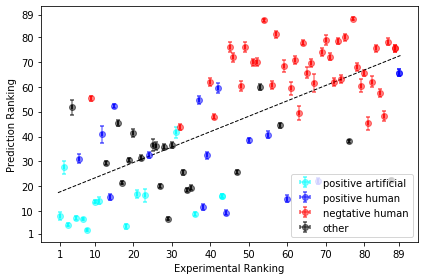

<Figure size 432x288 with 0 Axes>

In [4]:
calc_all =False #if this flag is false: use each prediction result to do the correlation (32 times), otherwise take the average of them.
experimental_tg = cpe.read_experimental_txt(experimental_data)
n_models = 32
run_type ='ranking'
if calc_all:
  prediction_data = os.path.join(home_dir, 'rnn_modular_package', 'combine_32_model.csv')
  predictionary = cpe.read_average_prediction_reults(prediction_data, run_type)
  prediction_values, experimental_values, sequences = cpe.matching_value(experimental_tg, predictionary,run_type)
  cpe.plot_value(prediction_values,experimental_values, sequences, run_type,[0.0 for i in range(len(prediction_values))],[0.0 for i in range(len(experimental_values))])
else:
  pred_value =[]
  exp_value =[]

  for i in range(n_models):#32 model
    predictionary = cpe.read_seperate_prediction_results('all_predict_checkpoints', i, run_type,home_dir)
    prediction_values, experimental_values, sequences = cpe.matching_value(experimental_tg, predictionary,run_type)
    pred_value.append(prediction_values)
    exp_value.append(experimental_values)
  ave_pred_value = []
  std_pred_value =[]
  ave_exp_value=[]
  std_exp_value=[]
  for j in range(len(pred_value[0])):
    ave_pred_value.append(np.mean([pred_value[x][j] for x in range(n_models)]))
    std_pred_value.append(np.std([pred_value[x][j] for x in range(n_models)]))
    ave_exp_value.append(np.mean([exp_value[x][j] for x in range(n_models)]))
    std_exp_value.append(np.std([exp_value[x][j] for x in range(n_models)]))
  sem_exp_value=[s/np.sqrt(n_models) for s in std_exp_value]
  sem_pred_value=[s/np.sqrt(n_models) for s in std_pred_value]

  #-----------------------------------------------------------------------------------------------# 
  #will show figures and also save the figures named as combined_ranking_comparison_based_RNN.png
  #-----------------------------------------------------------------------------------------------# 
  #cpe.plot_value(ave_pred_value,ave_exp_value, sequences, run_type,std_pred_value,std_exp_value) #RMSE 
  cpe.plot_value(ave_pred_value,ave_exp_value, sequences, run_type,sem_pred_value,sem_exp_value, neg_sequences_h, neg_sequences_a,pos_sequences_h, pos_sequences_a)  #SEM error bar 

  #################################################################################################
  # below is the figure that compares experimental dataset ranking with prediction dataset ranking#

                                      # RANKING comparison #
  #################################################################################################

#--- total number of human negative i  39 -------*
#--- total number of human poitive is  15 -------*
#--- total number of artificial negative i  0 ---*
#--- total number of artificial poitive is  14 ---*
#--- total number of other is  21 ---------------*
********** Pearson R is 0.6653075883272039 ******************************
********** correlation i y = 0.58x+2.24 *******************************


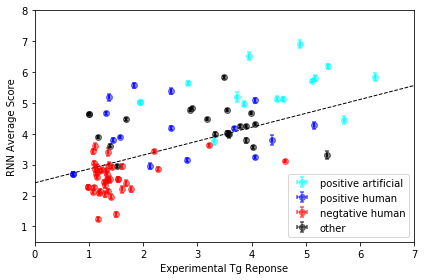

<Figure size 432x288 with 0 Axes>

In [5]:
run_type='score'
pred_value =[]
exp_value =[]
for i in range(n_models):#32 model 
    predictionary = cpe.read_seperate_prediction_results('all_predict_checkpoints', i, run_type,home_dir)
    prediction_values, experimental_values, sequences = cpe.matching_value(experimental_tg, predictionary,run_type)
    pred_value.append(prediction_values)
    exp_value.append(experimental_values)
ave_pred_value = []
std_pred_value =[]
ave_exp_value=[]
std_exp_value=[]
for j in range(len(pred_value[0])):
    ave_pred_value.append(np.mean([pred_value[x][j] for x in range(n_models)]))
    std_pred_value.append(np.std([pred_value[x][j] for x in range(n_models)]))
    ave_exp_value.append(np.mean([exp_value[x][j] for x in range(n_models)]))
    std_exp_value.append(np.std([exp_value[x][j] for x in range(n_models)]))
sem_exp_value=[s/np.sqrt(n_models) for s in std_exp_value]
sem_pred_value=[s/np.sqrt(n_models) for s in std_pred_value]

#-----------------------------------------------------------------------------------------------# 
#will show figures and also save the figures named as combined_ranking_comparison_based_RNN.png
#-----------------------------------------------------------------------------------------------# 
#cpe.plot_value(ave_pred_value,ave_exp_value, sequences, run_type,std_pred_value,std_exp_value) #RMSE
cpe.plot_value(ave_pred_value,ave_exp_value, sequences, run_type,sem_pred_value,sem_exp_value, neg_sequences_h, neg_sequences_a,pos_sequences_h, pos_sequences_a)  #SEM error bar 

###############################################################################################
######  below is the figure that compares experimental tg scores with prediction scores  ######

                                      # SCORES comparison #
###############################################################################################